# Setup

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

### 1) Apply Hough transform (circular objects detection) and blob detection algorithm to detect coins present in image 'coins_1.jfif'. Comment on the outcomes of two methods.

In [2]:
img = cv.imread('coins_1.jfif')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gray = cv.medianBlur(img_gray, 5)
rows = img_gray.shape[0]

circles = cv.HoughCircles(img_gray, cv.HOUGH_GRADIENT, 1, rows/8, param1 = 50, param2 = 25, minRadius=10, maxRadius=30)
img_hough = img.copy()

if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(img_hough, center, 1, (0, 100, 100), 1)
        # circle outline
        radius = i[2]
        cv.circle(img_hough, center, radius, (0, 255, 0), 2)
        
    
img_blob = img.copy()
params = cv.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0
params.maxThreshold = 255


# Filter by Area
params.filterByArea = True

# Filter by Circularity
params.filterByCircularity = True

# Filter by Convexity
params.filterByConvexity = False

# Filter by Inertia
params.filterByInertia = False

params.blobColor = 255
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(img_gray)

# Draw detected blobs as circles
blank = np.zeros((1,1))
img_blob = cv.drawKeypoints(img_blob, keypoints, blank, (0, 255, 0), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow('Hough transform', img_hough)
cv.imshow('Blob detection', img_blob)

cv.waitKey(0)
cv.destroyAllWindows()

### 2) Apply k-means clustering on 'zebra.jfif' to segment out the zebra.
- You are required to determine the optimal k by plotting the within cluster sum of squares vs number of clusters (2-10).
- Apply the clustering method on 2 color space: BGR and HSV and compare the results obtained.

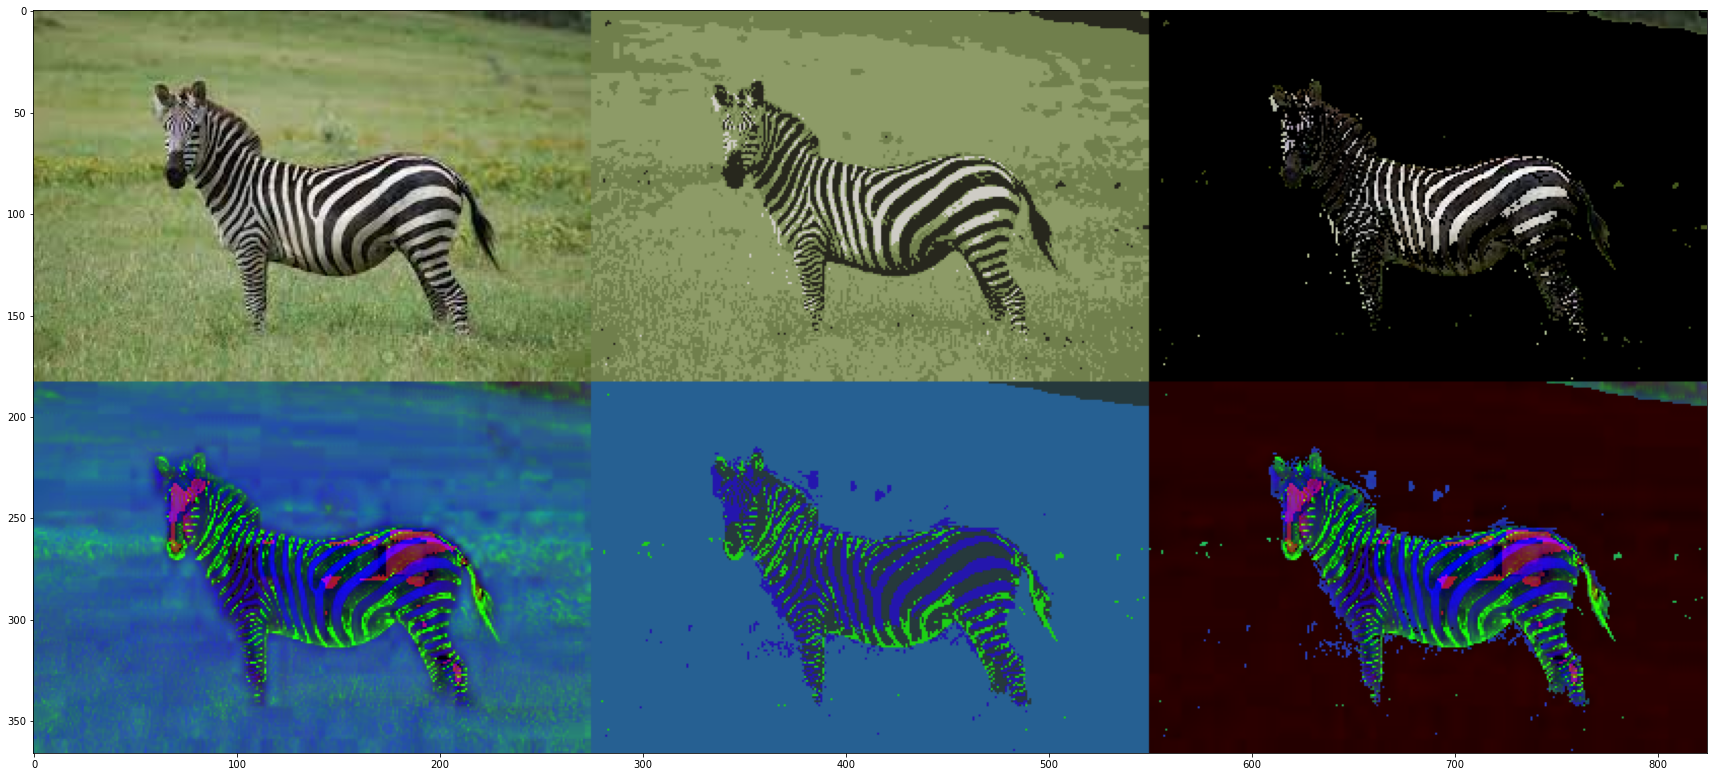

In [3]:
img_rgb = cv.imread('zebra.jfif')
img_hsv = cv.cvtColor(img_rgb, cv.COLOR_BGR2HSV)

rgb_reshape = np.float32(img_rgb.reshape((-1, 3)))
hsv_reshape = np.float32(img_hsv.reshape((-1, 3)))

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 20

ret, label, center = cv.kmeans(rgb_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
rgb_result = res.reshape((img_rgb.shape))
unique, counts = np.unique(label, return_counts=True)
colours = center[np.argpartition(counts, 2)[:2]]
rgb_segment = np.isin(rgb_result, (colours))
rgb_segmented = img_rgb.copy()
rgb_segmented[rgb_segment == False] = 0

ret, label, center = cv.kmeans(hsv_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
hsv_result = res.reshape((img_hsv.shape))
unique, counts = np.unique(label, return_counts=True)
colours = center[np.argpartition(counts, 3)[:3]]
hsv_segment =  np.isin(hsv_result, (colours))
hsv_segmented = img_hsv.copy()
hsv_segmented[hsv_segment == False] = 0

row1 = cv.cvtColor(np.concatenate((img_rgb, rgb_result, rgb_segmented), axis = 1), cv.COLOR_BGR2RGB)
row2 = np.concatenate((img_hsv, hsv_result, hsv_segmented), axis = 1)
result = np.concatenate((row1, row2))

plt.figure(figsize = (30, 30))
plt.imshow(result)

# HSV is better compare to RGB